# Convolutional Neural Networks for Image Classification
___

### Imports

In [1]:
import numpy as np
import pandas as pd

### Loading MNIST Data

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Visualizing the Image Data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
single_image.shape

(28, 28)

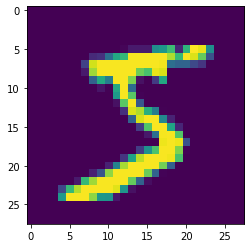

In [9]:
plt.imshow(single_image)

Pic shows that the number is 5

## PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

### Labels

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

It looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Keras has an easy to use function for this:

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [18]:
y_cat_test = to_categorical(y_test, num_classes=10)

### Processing X Data

We should normalize the X data

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [21]:
x_train = x_train/255
x_test = x_test/255

In [24]:
scaled_single = x_train[0]

In [25]:
scaled_single

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
scaled_single.max()

1.0

In [27]:
scaled_single.min()

0.0

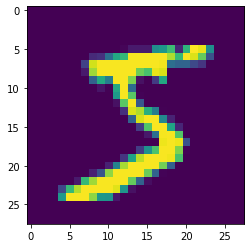

In [28]:
plt.imshow(scaled_single)

Image should be same even after scaling.

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [32]:
# 60000 --> Total images in the dataset
# 28 -----> Height of the single image
# 28 -----> Weight of the single image
# 1 ------> Color channel

x_train = x_train.reshape(60000, 28, 28, 1)

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [35]:
x_test.shape

(10000, 28, 28, 1)

## Training the Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(units=128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES and ACTIVATION=SOFTMAX for this
model.add(Dense(units=10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy']  # we can add in additional metrics https://keras.io/metrics/
             )

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Using EarlyStopping to avoid overfitting

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

## Train the Model

In [43]:
model.fit(x=x_train, y=y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1384 - accuracy: 0.9582 - val_loss: 0.0535 - val_accuracy: 0.9814
Epoch 2/15
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0461 - val_accuracy: 0.9842
Epoch 3/15
60000/60000 [==============================] - 10s 158us/sample - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0379 - val_accuracy: 0.9883
Epoch 4/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0375 - val_accuracy: 0.9874
Epoch 5/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0385 - val_accuracy: 0.9877
Epoch 6/15
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0384 - val_accuracy: 0.9891


## Evaluate the Model

#### To see the available metrics

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
losses = pd.DataFrame(model.history.history)

In [46]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.138387,0.958200,0.053507,0.9814
1,0.046168,0.986000,0.046075,0.9842
2,0.030637,0.990733,0.037870,0.9883
3,0.020252,0.993433,0.037524,0.9874
4,0.013838,0.995550,0.038453,0.9877


#### `accuracy` vs `val_accuracy`

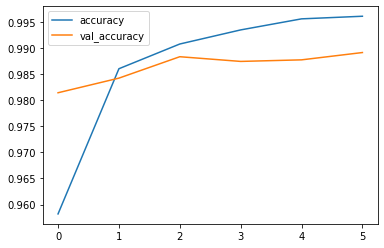

In [47]:
losses[['accuracy', 'val_accuracy']].plot()

#### `loss` vs `val_loss`

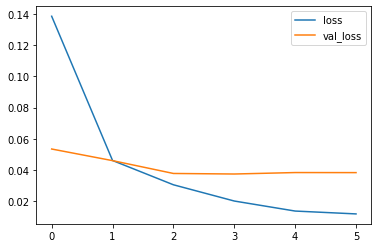

In [48]:
losses[['loss', 'val_loss']].plot()

In [50]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[0.03841305225964188, 0.9891]


## Classification Report and Confusion Matrix

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
predictions = model.predict_classes(x_test)

In [53]:
y_cat_test.shape

(10000, 10)

#### First image number in test data (categirical)

In [54]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### First predicted image number

In [55]:
predictions[0]

7

#### First image number in test data 

In [56]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Classification Report

In [58]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Confusion Matrix

In [59]:
print(confusion_matrix(y_true=y_test, y_pred=predictions))

[[ 975    0    0    0    0    0    3    0    1    1]
 [   0 1133    1    0    0    0    0    0    0    1]
 [   2    2 1019    0    1    0    1    5    2    0]
 [   0    1    3  998    0    5    0    0    2    1]
 [   0    0    0    0  971    0    3    0    1    7]
 [   1    0    0    6    0  881    2    0    2    0]
 [   4    2    0    1    2    1  945    0    3    0]
 [   1    2    5    1    0    1    0 1010    1    7]
 [   3    1    1    1    0    0    1    2  961    4]
 [   2    2    1    0    3    3    0    0    0  998]]


### Confusion Matrix as HeatMap

In [60]:
import seaborn as sns

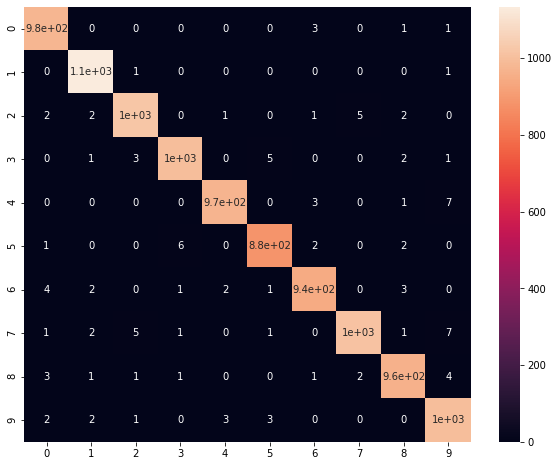

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=predictions), annot=True)

___

## Thank You!